
<h2> :تعریف مسئله </h2>
    <h5>  پیش بینی دوز روزانه تعریف شده هر آنتی بیوتیک در سال ۲۰۱۶</h5>

In [2]:
import joblib as jl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 500)

<h5> در این مرحله کتابخانه های مورد نیاز برای کار با داده و رسم نمودار هارا فراخوانی کرده ایم</h5>

In [3]:
DDD_monthly=pd.read_excel('S4 Table_v1_copy.xlsx',sheet_name='Sheet5_1')
DiD_monthly=pd.read_excel('S4 Table_v1_copy.xlsx',sheet_name='Sheet5_2')

print(DDD_monthly.shape)
print(DiD_monthly.shape)

(60, 33)
(60, 33)


In [3]:
DDD_monthly.head()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
0,2011,1,808432.000,82178.000,2293639.733,1581290.866,127553.930,5972.5,9162924.181,406202.703,2058451.515,7040602.997,6032657.597,394812.290,251266.770,368847.250,36463.432,1237.0,4389,119226.160,392.333,7487988.898,380046.361,37402.00,52860,1018480.019,5763453.833,132180.089,3630.0,84503.997,1445471.114,141632.145,3048642.614
1,2011,2,616620.000,45122.249,1157493.301,696282.870,61136.109,2862.5,4769411.292,197234.987,1104342.020,3834669.059,3377467.094,213818.791,136951.505,233383.375,23492.001,8530.0,2709,55221.074,16.667,4290421.278,228961.590,18734.95,40400,500394.451,3398760.750,90030.334,80.0,53749.253,782166.776,75703.573,1526624.532
2,2011,3,802755.000,86423.583,1548117.088,1330648.932,90434.895,7289.5,5617689.068,329457.313,1533168.023,5369482.610,5093437.724,302455.411,223458.405,294797.625,43560.005,1065.5,1989,75328.491,372.000,5786752.595,310229.334,30463.00,44222,693269.037,5051867.449,116273.835,100.0,76247.333,1351392.389,107942.858,1763186.512
3,2011,4,736725.667,92561.667,1671628.510,1363893.906,115792.608,6653.0,8017712.683,364176.170,1815438.191,6185900.906,5902187.040,370186.554,267633.140,362011.755,50600.575,9556.0,3613,86446.006,56.667,6568900.356,321983.542,35843.55,53835,855185.891,5074208.550,130223.243,NaN,88784.166,1535450.236,115657.148,2382097.671
4,2011,5,1038556.000,73520.334,1444498.204,1482620.945,110954.716,8070.0,5187866.118,364026.142,1527030.980,5131659.714,5069753.803,283272.561,239699.765,289407.250,40764.858,1212.5,2541,76807.388,746.000,5769177.578,271341.397,32416.70,42679,753351.791,4407539.867,114328.253,97.0,81710.087,1354098.635,94492.855,2152837.945


In [4]:
DiD_monthly.tail()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
55,2015,8,0.314844,0.006068,0.369357,0.481403,0.021986,0.000289,1.747810,0.016423,0.303423,1.268537,1.123684,0.039556,0.024129,0.155579,0.012933,0.001845,0.001830,0.034103,0.000012,1.352435,0.071906,0.005409,0.011494,0.141730,1.044965,0.035400,0.0,0.039387,0.281526,0.056830,0.785960
56,2015,9,0.308779,0.007435,0.432951,0.468047,0.023989,0.000295,3.072444,0.022249,0.327536,1.388881,1.238770,0.043961,0.025989,0.181607,0.014481,0.000000,0.000662,0.042009,0.000000,1.436668,0.077777,0.001428,0.010968,0.165571,1.149064,0.041777,0.0,0.039046,0.312663,0.024216,0.739822
57,2015,10,0.294813,0.005639,0.302966,0.361268,0.017249,0.000312,1.253339,0.011034,0.238745,1.058658,0.987687,0.032404,0.017239,0.129643,0.014248,0.000000,0.000472,0.044870,0.000000,1.190487,0.056128,0.001357,0.003395,0.101938,0.831318,0.028133,0.0,0.030892,0.225616,0.022857,0.596443
58,2015,11,0.304965,0.006024,0.417773,0.507047,0.019695,0.000220,2.135304,0.019047,0.301642,1.238817,1.176274,0.034053,0.021126,0.148914,0.012680,0.001845,0.000089,0.036549,0.000000,1.461785,0.068537,0.001834,0.004498,0.125108,0.991483,0.033658,0.0,0.031807,0.277960,0.025558,0.780497
59,2015,12,0.393283,0.008865,0.484667,0.417484,0.021520,0.000453,2.753057,0.022413,0.321758,1.440175,1.350199,0.046664,0.025861,0.168184,0.015936,0.000000,0.001564,0.042524,0.000006,1.709658,0.070667,0.004334,0.006282,0.144867,1.137108,0.039504,0.0,0.037684,0.294817,0.020940,0.861170


<ul>
    <li>
        <h5 style="text-align:right"><span style="font-size:28px"><span style="font-family:Courier New,Courier,monospace"><span style="background-color:#f1c40f"><strong>دراین مرحله داده های شیت 5-1 و 5-1 خوانده می شود</strong></span></span></span></h5>
        </li>
	<li>&nbsp;</li>
    <li style="text-align: right;"><span style="font-size:28px"><span style="font-family:Courier New,Courier,monospace"><span style="background-color:#f1c40f"><strong>در این داده ها سال و ماه در سطر قرار دارند و دسته بندی ریز آنتی بیوتیک در ستون</strong></span></span></span></li>
    	<li style="text-align: right;">&nbsp;</li>
	<li style="text-align: right;"><span style="font-size:28px"><span style="font-family:Courier New,Courier,monospace"><span style="background-color:#f1c40f"><strong>مقدار هر سلول&nbsp; میزان دوز مصرفی آنتی بیوتیک را نشان می دهد</strong></span></span></span></li>
</ul>

<p style="text-align:right">&nbsp;</p>

In [5]:
DDD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   37 non-null     float64
 18  J01EB   60 non-null     int64  
 19  J01EC   60 non-null     float64
 20  J01EE   27 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [6]:
DiD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   60 non-null     float64
 18  J01EB   60 non-null     float64
 19  J01EC   60 non-null     float64
 20  J01EE   60 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [13]:
DDD_monthly.dtypes

year       int64
month      int64
J01AA    float64
J01BA    float64
J01CA    float64
J01CE    float64
J01CF    float64
J01CG    float64
J01CR    float64
J01DA    float64
J01DB    float64
J01DC    float64
J01DD    float64
J01DE    float64
J01DF    float64
J01DH    float64
J01DI    float64
J01EA    float64
J01EB      int64
J01EC    float64
J01EE    float64
J01FA    float64
J01FF    float64
J01FG    float64
J01GA      int64
J01GB    float64
J01MA    float64
J01XA    float64
J01XB    float64
J01XC    float64
J01XD    float64
J01XE    float64
J01XX    float64
dtype: object

In [7]:
DDD_monthly.columns

Index(['year', 'month', 'J01AA', 'J01BA', 'J01CA', 'J01CE', 'J01CF', 'J01CG',
       'J01CR', 'J01DA', 'J01DB', 'J01DC', 'J01DD', 'J01DE', 'J01DF', 'J01DH',
       'J01DI', 'J01EA', 'J01EB', 'J01EC', 'J01EE', 'J01FA', 'J01FF', 'J01FG',
       'J01GA', 'J01GB', 'J01MA', 'J01XA', 'J01XB', 'J01XC', 'J01XD', 'J01XE',
       'J01XX'],
      dtype='object')

In [8]:
DiD_monthly.columns

Index(['year', 'month', 'J01AA', 'J01BA', 'J01CA', 'J01CE', 'J01CF', 'J01CG',
       'J01CR', 'J01DA', 'J01DB', 'J01DC', 'J01DD', 'J01DE', 'J01DF', 'J01DH',
       'J01DI', 'J01EA', 'J01EB', 'J01EC', 'J01EE', 'J01FA', 'J01FF', 'J01FG',
       'J01GA', 'J01GB', 'J01MA', 'J01XA', 'J01XB', 'J01XC', 'J01XD', 'J01XE',
       'J01XX'],
      dtype='object')

<h5> در این مرحله خلاصه ایی از اطلاعات داده ها را چاپ کردیم</h5>

In [4]:
DDD_monthly=DDD_monthly.astype({'year':'int64', 'month':'int64', 'J01AA':'float64', 'J01BA':'float64', 'J01CA':'float64',
                    'J01CE':'float64', 'J01CF':'float64', 'J01CG':'float64','J01CR':'float64', 'J01DA':'float64',
                    'J01DB':'float64', 'J01DC':'float64', 'J01DD':'float64', 'J01DE':'float64','J01DF':'float64',
                    'J01DH':'float64','J01DI':'float64', 'J01EA':'float64',
                    'J01EB':'float64', 'J01EC':'float64', 'J01EE':'float64', 'J01FA':'float64', 'J01FF':'float64',
                    'J01FG':'float64', 'J01GA':'float64', 'J01GB':'float64', 'J01MA':'float64', 'J01XA':'float64',
                    'J01XB':'float64', 'J01XC':'float64', 'J01XD':'float64', 'J01XE':'float64', 'J01XX':'float64'})
DDD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   37 non-null     float64
 18  J01EB   60 non-null     float64
 19  J01EC   60 non-null     float64
 20  J01EE   27 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [18]:
DiD_monthly=DiD_monthly.astype({'year':'int64', 'month':'int64', 'J01AA':'float64', 'J01BA':'float64', 'J01CA':'float64',
                    'J01CE':'float64', 'J01CF':'float64', 'J01CG':'float64','J01CR':'float64', 'J01DA':'float64',
                    'J01DB':'float64', 'J01DC':'float64', 'J01DD':'float64', 'J01DE':'float64','J01DF':'float64',
                    'J01DH':'float64','J01DI':'float64', 'J01EA':'float64',
                    'J01EB':'float64', 'J01EC':'float64', 'J01EE':'float64', 'J01FA':'float64', 'J01FF':'float64',
                    'J01FG':'float64', 'J01GA':'float64', 'J01GB':'float64', 'J01MA':'float64', 'J01XA':'float64',
                    'J01XB':'float64', 'J01XC':'float64', 'J01XD':'float64', 'J01XE':'float64', 'J01XX':'float64'})
DiD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   60 non-null     float64
 18  J01EB   60 non-null     float64
 19  J01EC   60 non-null     float64
 20  J01EE   60 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

<h5>در این مرحله همسان سازی داده ها انجام میشود</h5> 

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
DDD_monthly.describe()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
count,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,37.00000,60.00000,60.00000,27.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,34.00000,60.00000,60.00000,60.00000,60.00000
mean,2013.00000,6.50000,1011680.66390,37748.65650,1508265.79248,1545272.98183,93518.47580,1830.47917,7165708.18497,108178.80668,1358527.81198,5442496.47575,4427985.28723,170284.70520,149622.32033,418254.72900,30563.86792,3622.94595,2381.30000,103862.22465,220.88893,5539823.97845,277209.25168,17213.06250,36511.13333,589795.43965,3970255.24763,125864.22303,1759.67647,99836.79820,1141095.23530,112752.31477,2642274.28678
std,1.42615,3.48118,209879.19055,19488.94360,275238.30976,335184.90944,16559.39310,2082.33803,1592029.32101,85569.49164,203829.44328,744161.82387,629705.88022,53462.12785,70760.39898,123224.66184,14069.90348,3965.80474,1516.59174,31569.92280,185.85963,773878.39359,37100.82173,6372.26646,11787.24191,111679.75497,583507.33829,22481.84731,1798.10765,29990.84620,163911.55947,110877.11681,498551.48478
min,2011.00000,1.00000,616620.00000,10993.16700,960667.05300,696282.87000,48937.39300,50.00000,4284636.24200,44864.53400,827250.07300,3793740.86700,2837966.66200,108730.33600,63348.50000,233383.37500,5539.42900,-339.25000,360.00000,55221.07400,-20.00000,3610638.81200,157096.80700,5518.00000,13779.00000,316625.84900,2797643.50000,77297.42100,-78.00000,53749.25300,647230.15700,-464257.13400,1526624.53200
25%,2012.00000,3.75000,861723.45850,25999.41700,1323105.54800,1358293.02950,86436.83925,707.25000,6041669.51500,60432.03125,1242884.13250,5026901.05275,4123737.92550,138397.73025,97780.09375,327065.91500,20503.56275,406.00000,1352.50000,79433.34275,53.33350,5077682.98300,256915.66725,13394.87500,29773.50000,529791.75525,3596878.33750,112317.66600,97.75000,78494.79200,1060899.73350,81415.68075,2288818.77350
50%,2013.00000,6.50000,1025744.91650,31491.45750,1448611.05000,1567270.16500,93480.89300,1100.00000,7057364.96700,68805.37050,1346127.04600,5404080.10450,4349239.04000,156078.12600,110512.38000,380016.50000,26762.28700,1125.00000,1962.00000,98730.65350,212.50000,5507361.15750,278825.97400,16718.25000,36546.00000,591324.36500,3960231.57950,121683.62400,1191.00000,90752.91450,1147921.22400,103403.57700,2673487.50050
75%,2014.00000,9.25000,1172548.75025,45965.85550,1675403.09075,1813291.75250,104994.56250,1738.06250,7743503.96575,129954.84125,1467844.50975,5817460.71275,4865262.60500,178328.01825,227518.74500,499379.62750,38545.14225,7500.00000,3061.50000,120138.12000,347.50000,5842133.62725,289932.77800,18977.93750,44235.75000,642196.99900,4272492.34025,140642.62200,2818.25000,121888.18750,1246715.25100,142013.39175,3026681.27575
max,2015.00000,12.00000,1599060.00000,92561.66700,2311695.44900,2118915.42800,129818.71500,8319.50000,12492330.34000,406202.70300,2058451.51500,8108802.58600,6032657.59700,394812.29000,288961.27500,738401.00000,64793.13700,15197.50000,7440.00000,200115.82000,746.00000,8019353.54000,380046.36100,37402.00000,71290.00000,1018480.01900,5763453.83300,184214.92000,5850.00000,160504.41400,1535450.23600,540946.39600,4037451.39600


In [13]:
DDD_monthly.head()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
0,2011,1,808432.00000,82178.00000,2293639.73300,1581290.86600,127553.93000,5972.50000,9162924.18100,406202.70300,2058451.51500,7040602.99700,6032657.59700,394812.29000,251266.77000,368847.25000,36463.43200,1237.00000,4389.00000,119226.16000,392.33300,7487988.89800,380046.36100,37402.00000,52860.00000,1018480.01900,5763453.83300,132180.08900,3630.00000,84503.99700,1445471.11400,141632.14500,3048642.61400
1,2011,2,616620.00000,45122.24900,1157493.30100,696282.87000,61136.10900,2862.50000,4769411.29200,197234.98700,1104342.02000,3834669.05900,3377467.09400,213818.79100,136951.50500,233383.37500,23492.00100,8530.00000,2709.00000,55221.07400,16.66700,4290421.27800,228961.59000,18734.95000,40400.00000,500394.45100,3398760.75000,90030.33400,80.00000,53749.25300,782166.77600,75703.57300,1526624.53200
2,2011,3,802755.00000,86423.58300,1548117.08800,1330648.93200,90434.89500,7289.50000,5617689.06800,329457.31300,1533168.02300,5369482.61000,5093437.72400,302455.41100,223458.40500,294797.62500,43560.00500,1065.50000,1989.00000,75328.49100,372.00000,5786752.59500,310229.33400,30463.00000,44222.00000,693269.03700,5051867.44900,116273.83500,100.00000,76247.33300,1351392.38900,107942.85800,1763186.51200
3,2011,4,736725.66700,92561.66700,1671628.51000,1363893.90600,115792.60800,6653.00000,8017712.68300,364176.17000,1815438.19100,6185900.90600,5902187.04000,370186.55400,267633.14000,362011.75500,50600.57500,9556.00000,3613.00000,86446.00600,56.66700,6568900.35600,321983.54200,35843.55000,53835.00000,855185.89100,5074208.55000,130223.24300,nan,88784.16600,1535450.23600,115657.14800,2382097.67100
4,2011,5,1038556.00000,73520.33400,1444498.20400,1482620.94500,110954.71600,8070.00000,5187866.11800,364026.14200,1527030.98000,5131659.71400,5069753.80300,283272.56100,239699.76500,289407.25000,40764.85800,1212.50000,2541.00000,76807.38800,746.00000,5769177.57800,271341.39700,32416.70000,42679.00000,753351.79100,4407539.86700,114328.25300,97.00000,81710.08700,1354098.63500,94492.85500,2152837.94500


In [12]:
DiD_monthly.describe()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
count,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000
mean,2013.00000,6.50000,0.23520,0.00856,0.34987,0.35923,0.02163,0.00041,1.66723,0.02431,0.31366,1.26262,1.02704,0.03912,0.03400,0.09820,0.00717,0.00051,0.00055,0.02426,0.00002,1.28441,0.06415,0.00396,0.00840,0.13609,0.92078,0.02935,0.00023,0.02338,0.26390,0.02665,0.61513
std,1.42615,3.48118,0.05287,0.00393,0.06673,0.08577,0.00363,0.00043,0.40844,0.01758,0.03930,0.18682,0.15517,0.01053,0.01450,0.03323,0.00351,0.00081,0.00036,0.00811,0.00004,0.18853,0.00817,0.00133,0.00257,0.02241,0.14137,0.00627,0.00036,0.00788,0.03500,0.02708,0.13105
min,2011.00000,1.00000,0.13945,0.00270,0.24626,0.15747,0.01254,0.00001,1.07863,0.01093,0.21206,0.86724,0.72750,0.02721,0.01624,0.05156,0.00117,-0.00007,0.00008,0.01249,-0.00000,0.92557,0.04027,0.00136,0.00340,0.08117,0.61615,0.01739,-0.00002,0.01216,0.16591,-0.10443,0.34526
25%,2012.00000,3.75000,0.19628,0.00604,0.30239,0.30079,0.01954,0.00017,1.41193,0.01443,0.29813,1.15084,0.92214,0.03274,0.02300,0.07504,0.00481,0.00000,0.00030,0.01836,0.00000,1.18396,0.05847,0.00313,0.00693,0.12378,0.82802,0.02503,0.00000,0.01726,0.24516,0.01863,0.51750
50%,2013.00000,6.50000,0.23688,0.00737,0.33060,0.34508,0.02200,0.00026,1.65412,0.01604,0.31239,1.25327,1.00572,0.03648,0.02610,0.08828,0.00615,0.00006,0.00045,0.02209,0.00000,1.25188,0.06433,0.00383,0.00852,0.13708,0.89666,0.02807,0.00001,0.02072,0.26601,0.02431,0.60988
75%,2014.00000,9.25000,0.27119,0.00992,0.38789,0.42115,0.02400,0.00041,1.80603,0.02758,0.33097,1.38022,1.12609,0.04199,0.05060,0.12036,0.00923,0.00120,0.00074,0.02912,0.00005,1.39081,0.06854,0.00448,0.01018,0.14723,1.01857,0.03346,0.00045,0.02928,0.28582,0.03373,0.70709
max,2015.00000,12.00000,0.39328,0.01954,0.55308,0.55416,0.02962,0.00176,3.07244,0.08574,0.43450,1.94007,1.41860,0.08334,0.06500,0.18161,0.01594,0.00321,0.00183,0.04823,0.00016,1.91867,0.08086,0.00789,0.01604,0.21498,1.25496,0.04407,0.00123,0.03939,0.33953,0.14255,0.96598


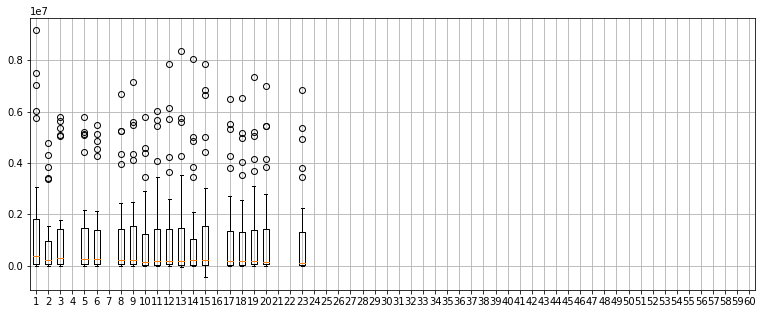

In [7]:
x1=DDD_monthly.loc[:,['J01AA', 'J01BA', 'J01CA', 'J01CE', 'J01CF', 'J01CG',
       'J01CR', 'J01DA', 'J01DB', 'J01DC', 'J01DD', 'J01DE', 'J01DF', 'J01DH',
       'J01DI', 'J01EA', 'J01EB', 'J01EC', 'J01EE', 'J01FA', 'J01FF', 'J01FG',
       'J01GA', 'J01GB', 'J01MA', 'J01XA', 'J01XB', 'J01XC', 'J01XD', 'J01XE',
       'J01XX']]
labels=str(['J01AA','J01BA', 'J01CA', 'J01CE', 'J01CF', 'J01CG','J01CR', 'J01DA',
        'J01DB', 'J01DC', 'J01DD', 'J01DE', 'J01DF', 'J01DH',       'J01DI', 
        'J01EA', 'J01EB', 'J01EC', 'J01EE', 'J01FA', 'J01FF', 'J01FG',      
        'J01GA', 'J01GB', 'J01MA', 'J01XA', 'J01XB', 'J01XC', 'J01XD', 'J01XE','J01XX'])
plt.figure(figsize=(13,5))
plt.boxplot(x1)
plt.grid()
plt.show()

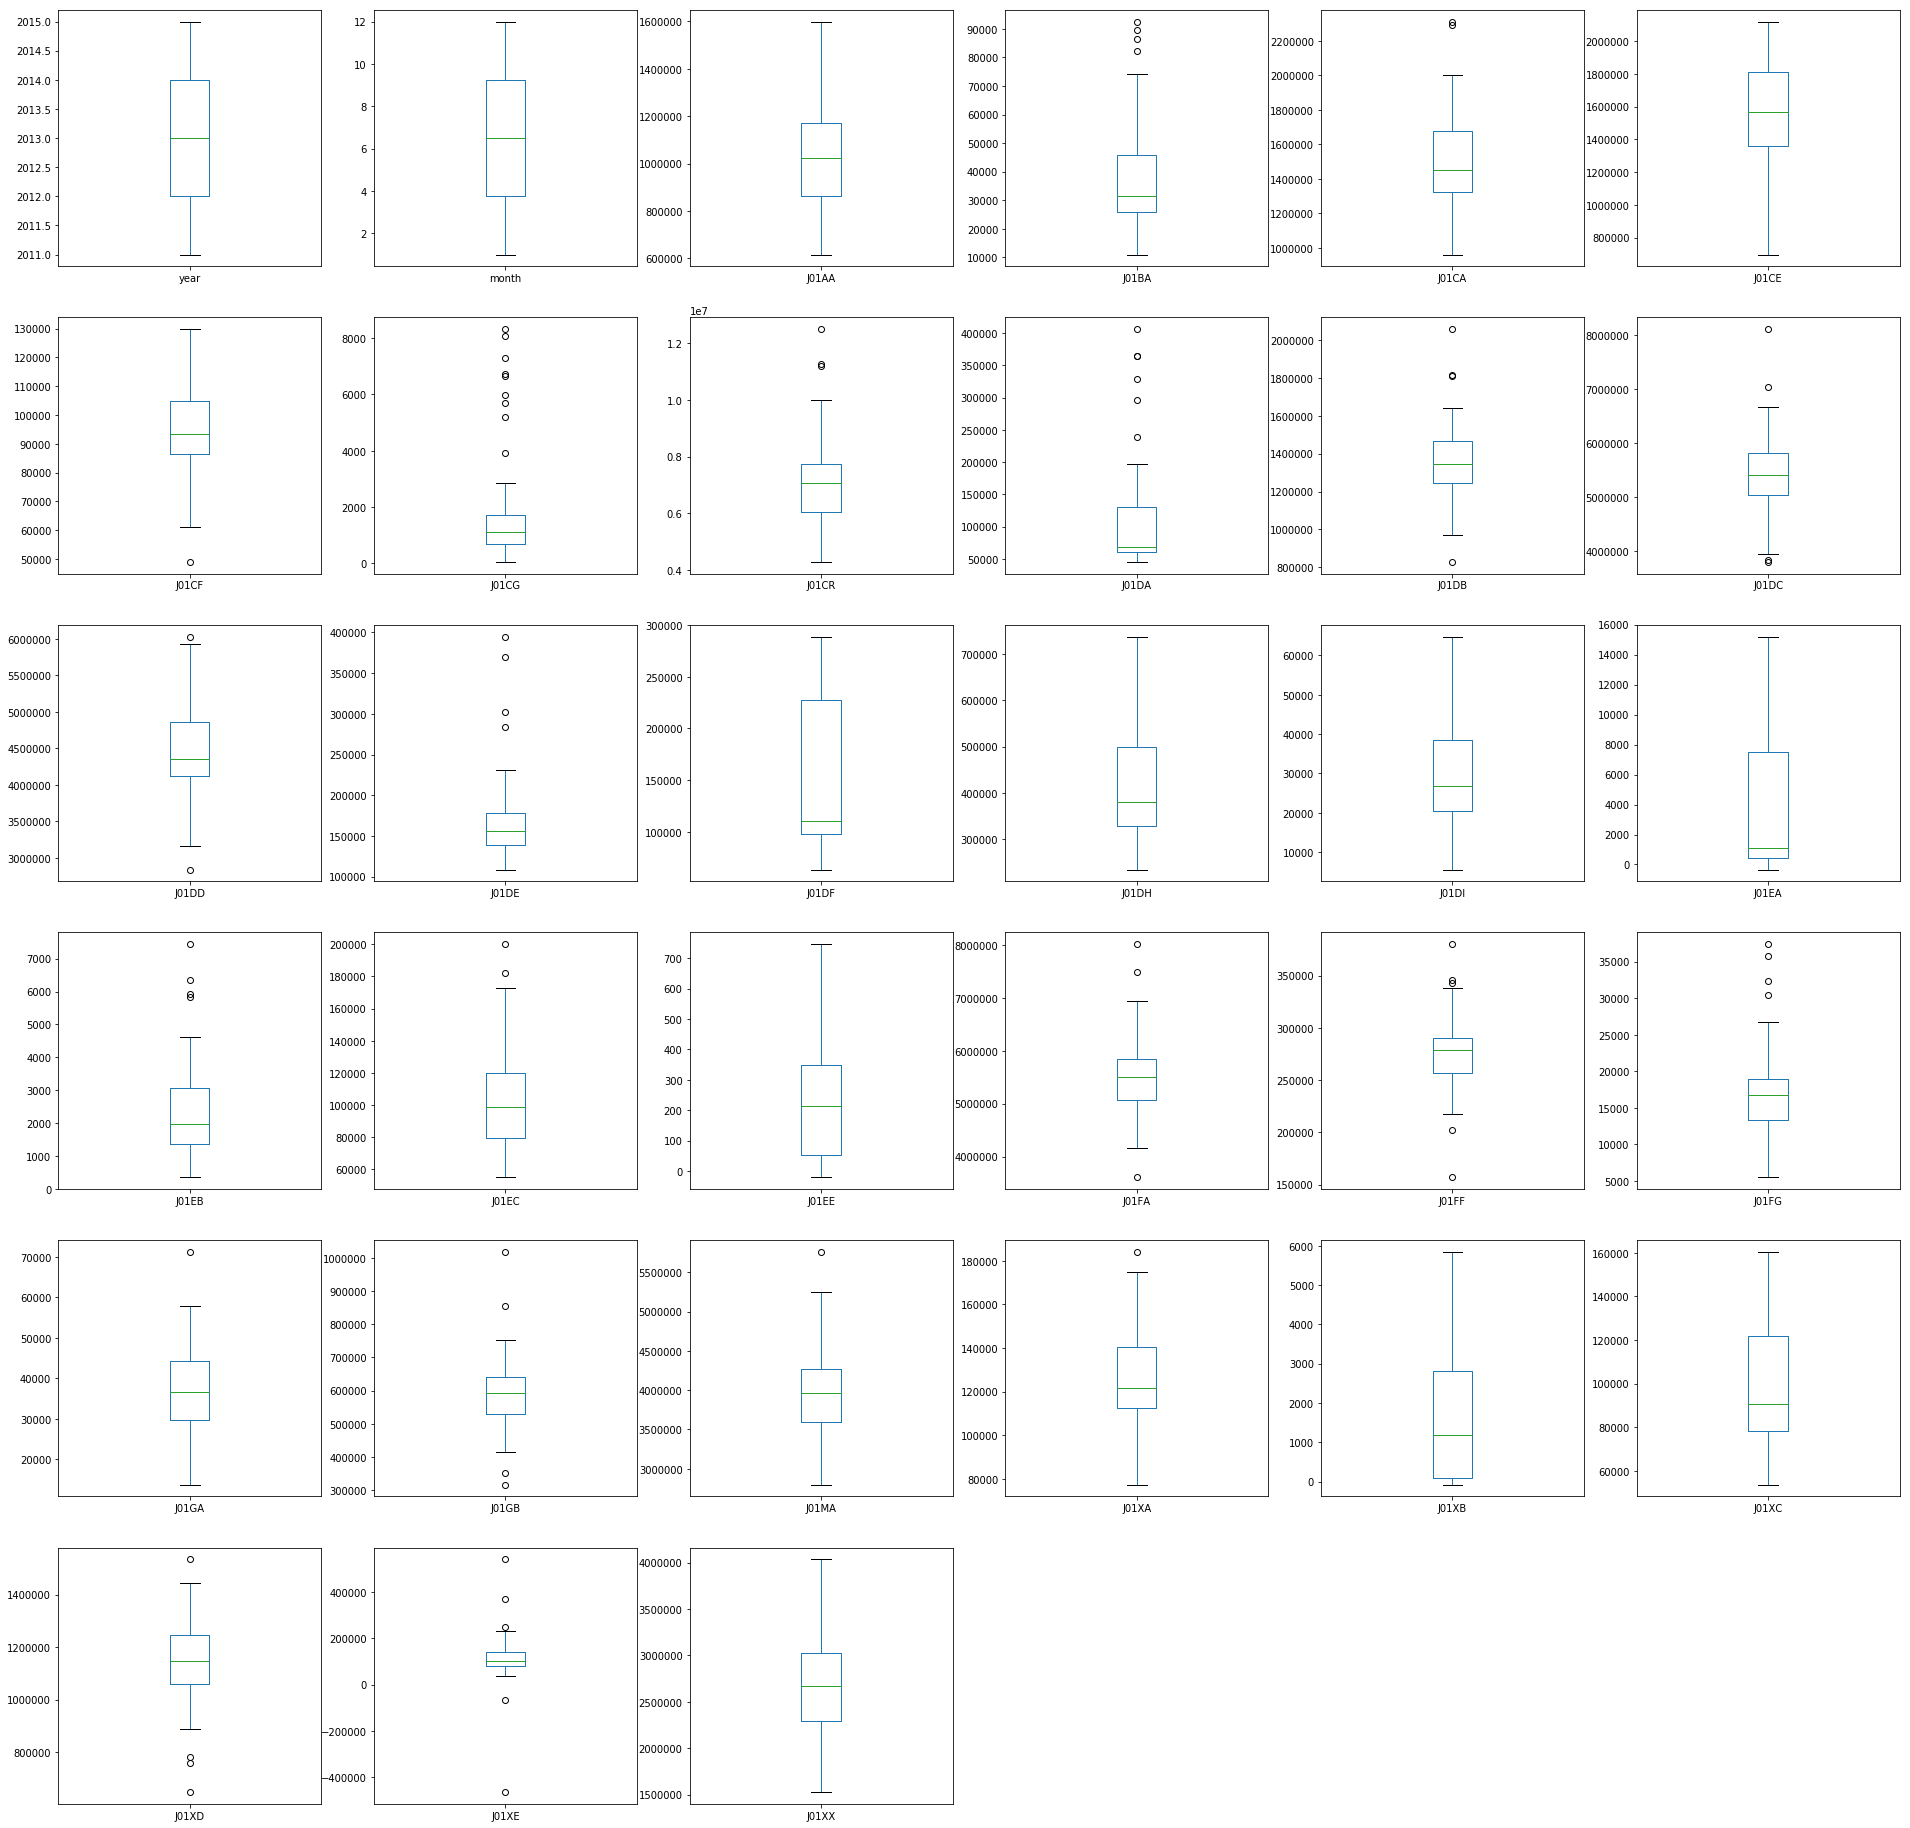

In [8]:
DDD_monthly.plot(kind='box',figsize=(33,33),layout=(6,6),subplots=True)
plt.show()

In [21]:
DDD_monthly=DDD_monthly.interpolate(method ='linear', limit_direction ='forward')
DDD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   60 non-null     float64
 18  J01EB   60 non-null     float64
 19  J01EC   60 non-null     float64
 20  J01EE   60 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

<h5> در این مرحله به توصیف آماری داده ها پرداخته شده است</h5>

In [10]:
number_of_DDD_ATC_4=pd.DataFrame()

for fcn in DDD_monthly.columns[2:] :
    df_temp2=DDD_monthly.loc[:,['year','month']]
    df_temp2['fcn_DDD']=fcn
    df_temp2['fcnv_DDD']=DDD_monthly.loc[:,[fcn]]
    print(df_temp2)
    number_of_DDD_ATC_4=pd.concat([number_of_DDD_ATC_4,df_temp2],axis=0)
   

    year  month fcn_DDD      fcnv_DDD
0   2011      1   J01AA  808432.00000
1   2011      2   J01AA  616620.00000
2   2011      3   J01AA  802755.00000
3   2011      4   J01AA  736725.66700
4   2011      5   J01AA 1038556.00000
5   2011      6   J01AA  723845.00000
6   2011      7   J01AA 1167219.66700
7   2011      8   J01AA 1165529.66600
8   2011      9   J01AA 1333814.33300
9   2011     10   J01AA  743772.00000
10  2011     11   J01AA 1091736.50000
11  2011     12   J01AA 1170854.00000
12  2012      1   J01AA  873786.50000
13  2012      2   J01AA  696654.66700
14  2012      3   J01AA  863607.66700
15  2012      4   J01AA 1056493.33300
16  2012      5   J01AA  894159.50000
17  2012      6   J01AA 1203036.66700
18  2012      7   J01AA 1144086.66700
19  2012      8   J01AA 1308565.66600
20  2012      9   J01AA 1030127.50000
21  2012     10   J01AA  644681.66700
22  2012     11   J01AA  911050.00000
23  2012     12   J01AA  707415.00000
24  2013      1   J01AA  858098.83300
25  2013    

In [23]:
number_of_DDD_ATC_4

,year,month,fcn_DDD,fcnv_DDD
0,2011,1,J01AA,808432.00000
1,2011,2,J01AA,616620.00000
2,2011,3,J01AA,802755.00000
3,2011,4,J01AA,736725.66700
4,2011,5,J01AA,1038556.00000
5,2011,6,J01AA,723845.00000
6,2011,7,J01AA,1167219.66700
7,2011,8,J01AA,1165529.66600
8,2011,9,J01AA,1333814.33300
9,2011,10,J01AA,743772.00000


In [11]:
monthly_DID_in_sample_ATC_4=pd.DataFrame()
for fcn in DiD_monthly.columns[2:] :
    df_temp2=DiD_monthly.loc[:,['year','month']]
    df_temp2['fcn_DID']=fcn
    df_temp2['fcnv_DID']=DiD_monthly.loc[:,[fcn]]
    monthly_DID_in_sample_ATC_4=pd.concat([monthly_DID_in_sample_ATC_4,df_temp2],axis=0)
monthly_DID_in_sample_ATC_4.head()

,year,month,fcn_DID,fcnv_DID
0,2011,1,J01AA,0.17064
1,2011,2,J01AA,0.13945
2,2011,3,J01AA,0.16945
3,2011,4,J01AA,0.15551
4,2011,5,J01AA,0.21922


In [25]:
number_of_DDD_ATC_4.shape

(1860, 4)

In [26]:
monthly_DID_in_sample_ATC_4.shape

(1860, 4)

<h5> در این مرحله ریز آنتی بیوتیک ها به عنوان ستون جدید در نظر گرفته میشود </h5>

In [13]:
DDD_DID=pd.concat([number_of_DDD_ATC_4,monthly_DID_in_sample_ATC_4['fcnv_DID']],axis=1,
                  ignore_index=True)
DDD_DID.columns=['year','month','fcn','fcnv_DDD','fcnv_DID']
DDD_DID.head()

,year,month,fcn,fcnv_DDD,fcnv_DID
0,2011,1,J01AA,808432.00000,0.17064
1,2011,2,J01AA,616620.00000,0.13945
2,2011,3,J01AA,802755.00000,0.16945
3,2011,4,J01AA,736725.66700,0.15551
4,2011,5,J01AA,1038556.00000,0.21922


In [14]:
DDD_DID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860 entries, 0 to 59
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1860 non-null   int64  
 1   month     1860 non-null   int64  
 2   fcn       1860 non-null   object 
 3   fcnv_DDD  1778 non-null   float64
 4   fcnv_DID  1860 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 87.2+ KB


In [15]:
print(DDD_DID.isnull().sum())

year         0
month        0
fcn          0
fcnv_DDD    82
fcnv_DID     0
dtype: int64


In [30]:
DDD_DID[DDD_DID['fcnv_DDD'].isna()]

,year,month,fcn,fcnv_DDD,fcnv_DID


In [34]:
DDD_DID.fcnv_DDD[DDD_DID['fcnv_DDD']<0]

7       -339.25000
31       -45.00000
10        -3.00000
13       -20.00000
10       -78.00000
13        -1.00000
17        -1.00000
12    -66739.24500
14   -464257.13400
Name: fcnv_DDD, dtype: float64

In [37]:
DDD_DID.query('fcnv_DDD<0')

,year,month,fcn,fcnv_DDD,fcnv_DID
7,2011,8,J01EA,-339.25000,-0.00007
31,2013,8,J01EA,-45.00000,-0.00001
10,2011,11,J01EE,-3.00000,-0.00000
13,2012,2,J01EE,-20.00000,-0.00000
10,2011,11,J01XB,-78.00000,-0.00002
13,2012,2,J01XB,-1.00000,-0.00000
17,2012,6,J01XB,-1.00000,-0.00000
12,2012,1,J01XE,-66739.24500,-0.01501
14,2012,3,J01XE,-464257.13400,-0.10443


In [33]:
jl.dump(DDD_DID,'DDD_DID_DataPreparation.pkl')

['DDD_DID_DataPreparation.pkl']

In [46]:
DDD_DID_new = DDD_DID.replace(to_replace =DDD_DID["fcnv_DDD"], value =np.abs(DDD_DID["fcnv_DDD"]) )




In [55]:
DDD_DID_noise=DDD_DID.query('fcnv_DDD<0')

In [56]:
DDD_DID_noise['fcnv_DDD']=np.abs(DDD_DID_noise['fcnv_DDD'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
DDD_DID_noise

,year,month,fcn,fcnv_DDD,fcnv_DID
7,2011,8,J01EA,339.25000,-0.00007
31,2013,8,J01EA,45.00000,-0.00001
10,2011,11,J01EE,3.00000,-0.00000
13,2012,2,J01EE,20.00000,-0.00000
10,2011,11,J01XB,78.00000,-0.00002
13,2012,2,J01XB,1.00000,-0.00000
17,2012,6,J01XB,1.00000,-0.00000
12,2012,1,J01XE,66739.24500,-0.01501
14,2012,3,J01XE,464257.13400,-0.10443


In [58]:
DDD_DID_noise['fcnv_DID']=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
DDD_DID_noise

,year,month,fcn,fcnv_DDD,fcnv_DID
7,2011,8,J01EA,339.25000,0
31,2013,8,J01EA,45.00000,0
10,2011,11,J01EE,3.00000,0
13,2012,2,J01EE,20.00000,0
10,2011,11,J01XB,78.00000,0
13,2012,2,J01XB,1.00000,0
17,2012,6,J01XB,1.00000,0
12,2012,1,J01XE,66739.24500,0
14,2012,3,J01XE,464257.13400,0
